# Image Classification with Convolutional Neural Nets

Implementation convolutional neural network to traina classifier to distinguish between cats and dogs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import os, shutil

## 1.  The Data
(source: https://www.kaggle.com/chetankv/dogs-cats-images)

    dogs-cats-images
    |__ dataset
        |__ train
            |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
            |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
        |__ validation
            |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
            |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
 

In [2]:

train_dir = '/home/harazat/Desktop/Tumo/ML lana/5/practice/dogs-cats-images/dataset/training_set'
validation_dir = '/home/harazat/Desktop/Tumo/ML lana/5/practice/dogs-cats-images/dataset/test_set'

In [3]:
#import pathlib
#data_dir = tf.keras.utils.get_file(origin='harazat/Desktop/Tumo/ML lana/5/practice/dogs-cats-images.zip',
#                                  fname= 'dogs-cats-images', untar=True)

We've declared the several parameters below; run this cell to ensure they're declared in our code. You can adjust these as you like

In [4]:
batch_size = 128
epochs = 15
cIMG_HEIGHT = 150
cIMG_WIDTH = 150
total_train = 3000
total_val = 1500

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# Loading the images


In [12]:

training_data = train_image_generator.flow_from_directory(directory=str(train_dir),
                                                         batch_size=batch_size,
                                                         shuffle=True,
                                                         target_size=(cIMG_HEIGHT, cIMG_WIDTH),
                                                         class_mode= 'binary')
validation_data = validation_image_generator.flow_from_directory(directory=str(train_dir),
                                                         batch_size=batch_size,
                                                         shuffle=False,
                                                         target_size=(cIMG_HEIGHT, cIMG_WIDTH),
                                                         class_mode= 'binary')

Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


## Visualizing the data


In [7]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    


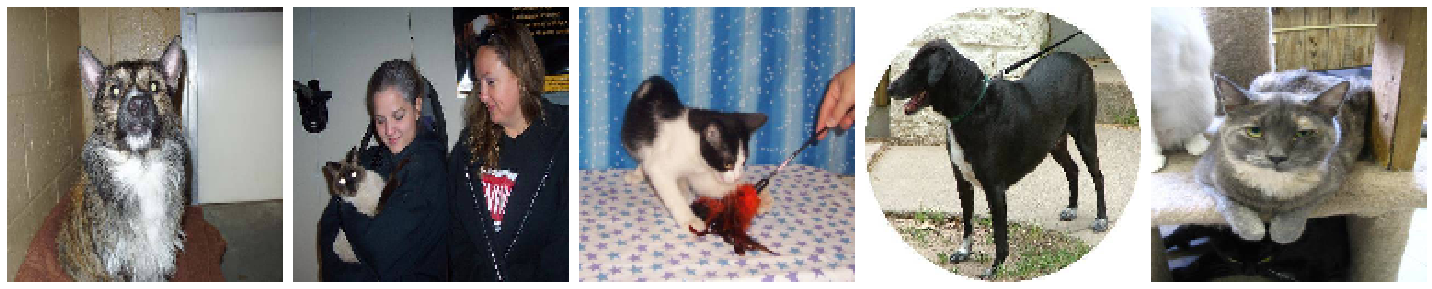

In [13]:

train_data_sample,returned_variable = next(training_data)
plot_images(train_data_sample)

In [14]:
returned_variable

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0.], dtype=float32)

## 2. The Model


In [9]:

from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.Sequential([
   Conv2D(filters=16, kernel_size=3,activation='relu', padding ='same', 
                        input_shape=(cIMG_HEIGHT, cIMG_WIDTH, 3)),
   MaxPooling2D(),
   Conv2D(filters=32,kernel_size=3, activation='relu', padding ='same'),
   MaxPooling2D(),
   Conv2D(filters=64,kernel_size=3, activation='relu', padding ='same'),
   MaxPooling2D(),
   Flatten(),
   Dense(512, activation='relu'),
   Dense(1)
    
])

### Compiling


In [15]:

model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics= ['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## 3. Training our model


In [18]:

#history = None
history = model.fit(training_data,
    steps_per_epoch= total_train//batch_size,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps= total_val//batch_size,
)

Train for 23 steps, validate for 11 steps
Epoch 1/15
23/23 [==============================] - 96s 4s/step - loss: 0.6447 - accuracy: 0.5999 - val_loss: 0.6515 - val_accuracy: 0.9318
Epoch 2/15
23/23 [==============================] - 93s 4s/step - loss: 0.5948 - accuracy: 0.6556 - val_loss: 0.3926 - val_accuracy: 0.9773
Epoch 3/15
23/23 [==============================] - 91s 4s/step - loss: 0.5497 - accuracy: 0.7013 - val_loss: 0.5118 - val_accuracy: 0.9070
Epoch 4/15
23/23 [==============================] - 87s 4s/step - loss: 0.5126 - accuracy: 0.7302 - val_loss: 0.4268 - val_accuracy: 0.9339
Epoch 5/15
23/23 [==============================] - 88s 4s/step - loss: 0.4644 - accuracy: 0.7643 - val_loss: 0.4093 - val_accuracy: 0.9354
Epoch 6/15
23/23 [==============================] - 91s 4s/step - loss: 0.4213 - accuracy: 0.7834 - val_loss: 0.4973 - val_accuracy: 0.8558
Epoch 7/15
23/23 [==============================] - 86s 4s/step - loss: 0.3877 - accuracy: 0.8130 - val_loss: 0.2373 -

## 4. Evaluating our model 



In [19]:

def plot_history(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(8,8))
    plt.subplot(1, 2, 1)
    
    epochs_range = range(epochs)
    
    plt.plot(epochs_range, train_acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

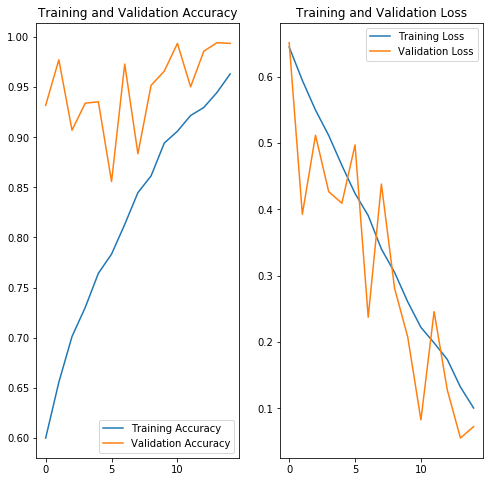

In [20]:
plot_history(history)